In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 

# 범주형 수치형 인코딩 및 정규화 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [73]:
from math import sqrt
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

keras = tf.keras

In [74]:
# 한글 표기를 위한 처리
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [75]:
# 데이터 로드
df = pd.read_csv('../data/train.csv')
df.head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [76]:
# 불러온 데이터 카피 
cp_df = df.copy()

In [77]:
cp_df.shape

(1733, 44)

# 간단한 EDA 시각화 

In [78]:
# 데이터 결측치 확인
# for col in df.columns:
#     print('column : {0} \t\t 결측치 : {1}'.format(col, df[col].isnull().sum()))

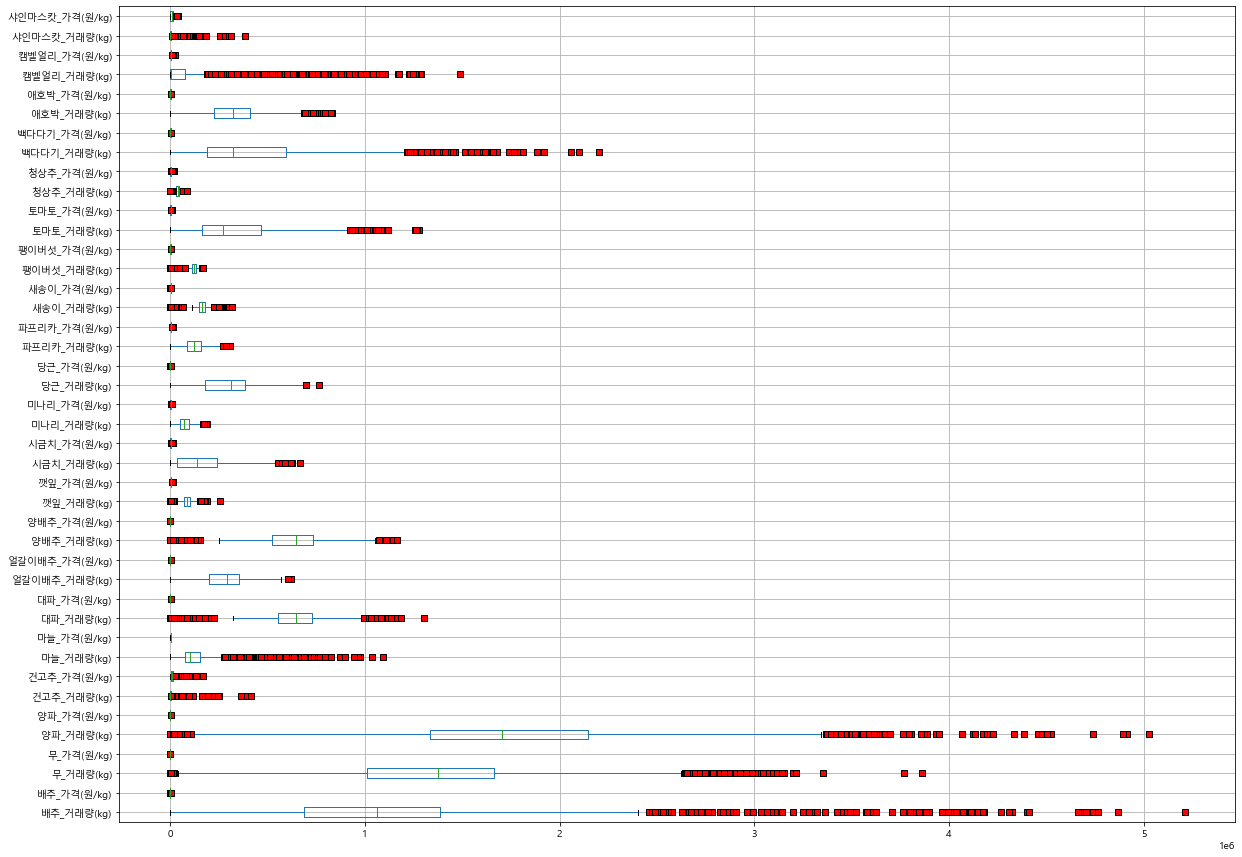

In [79]:
# 이상치 확인
df[df.columns].boxplot(figsize=(20, 15)
                                    , vert=False
                                    , flierprops=dict(markerfacecolor='r', marker='s'))
plt.show()

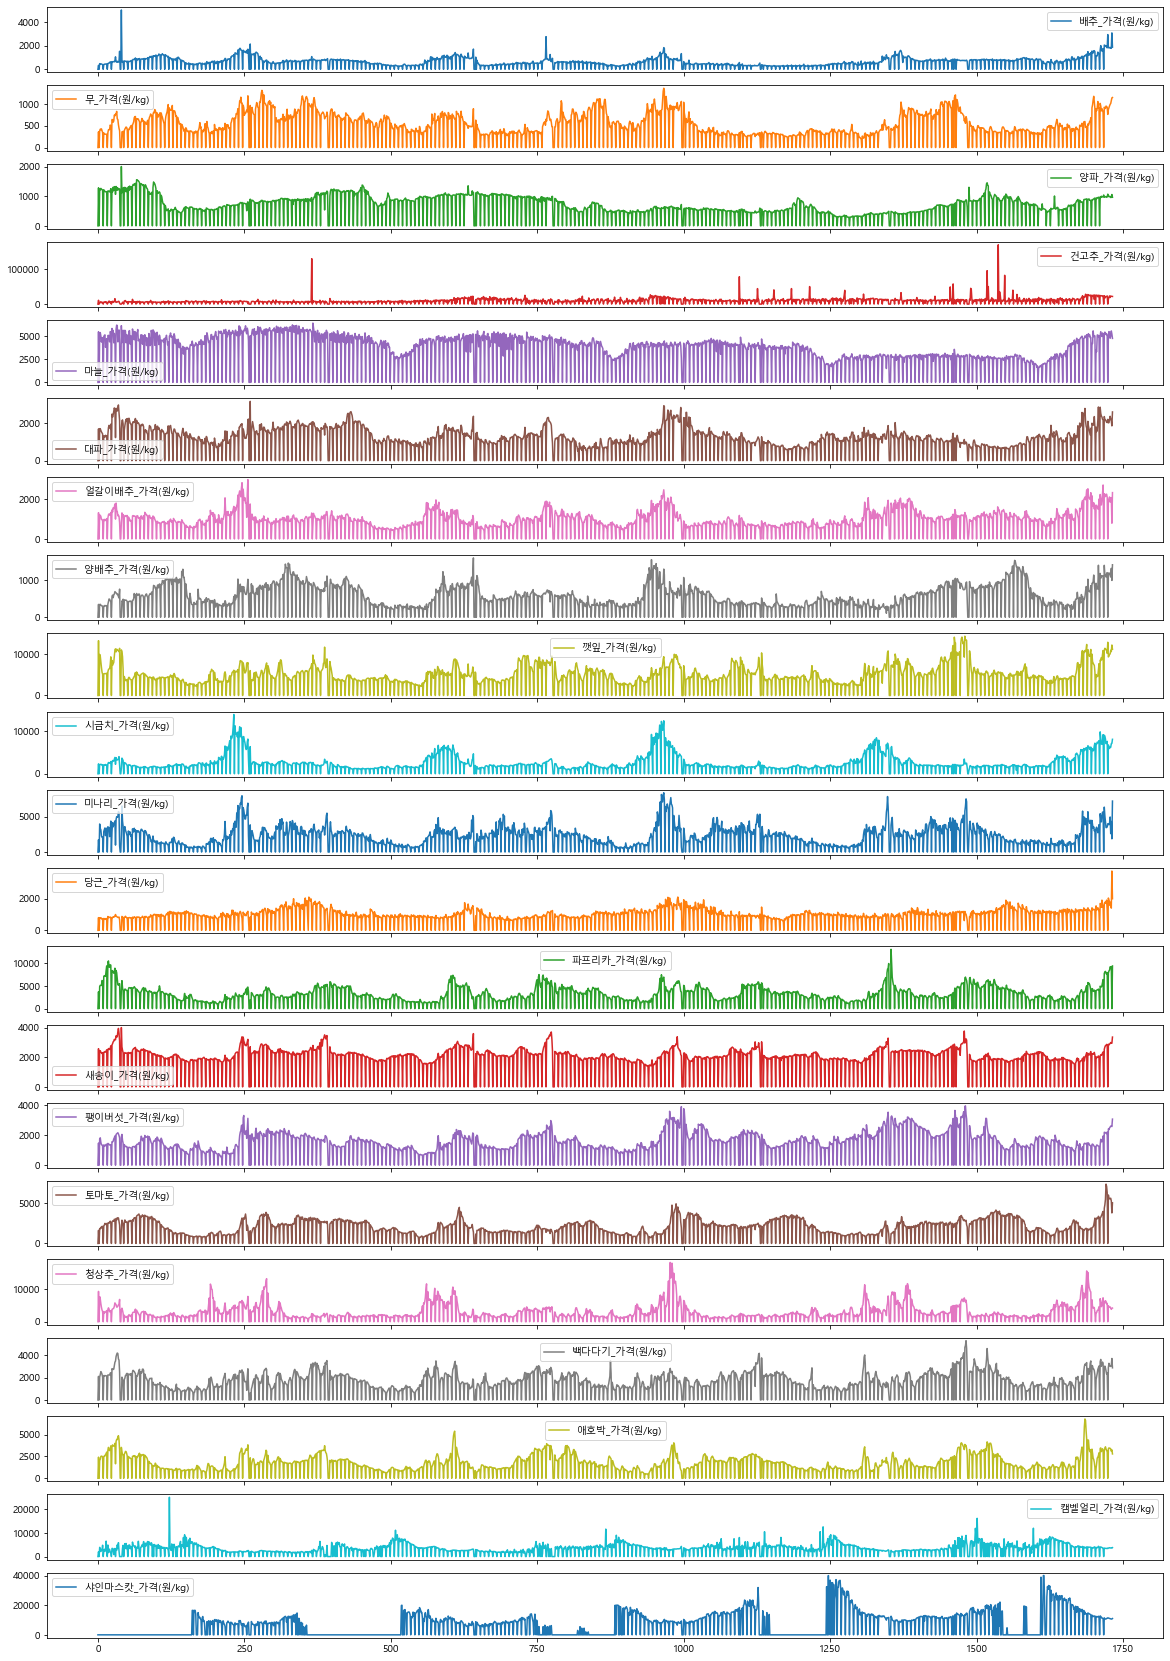

In [80]:
# 품목별 가격
df.iloc[:, 3::2].plot(figsize=(20, 30), subplots=True)
plt.show()

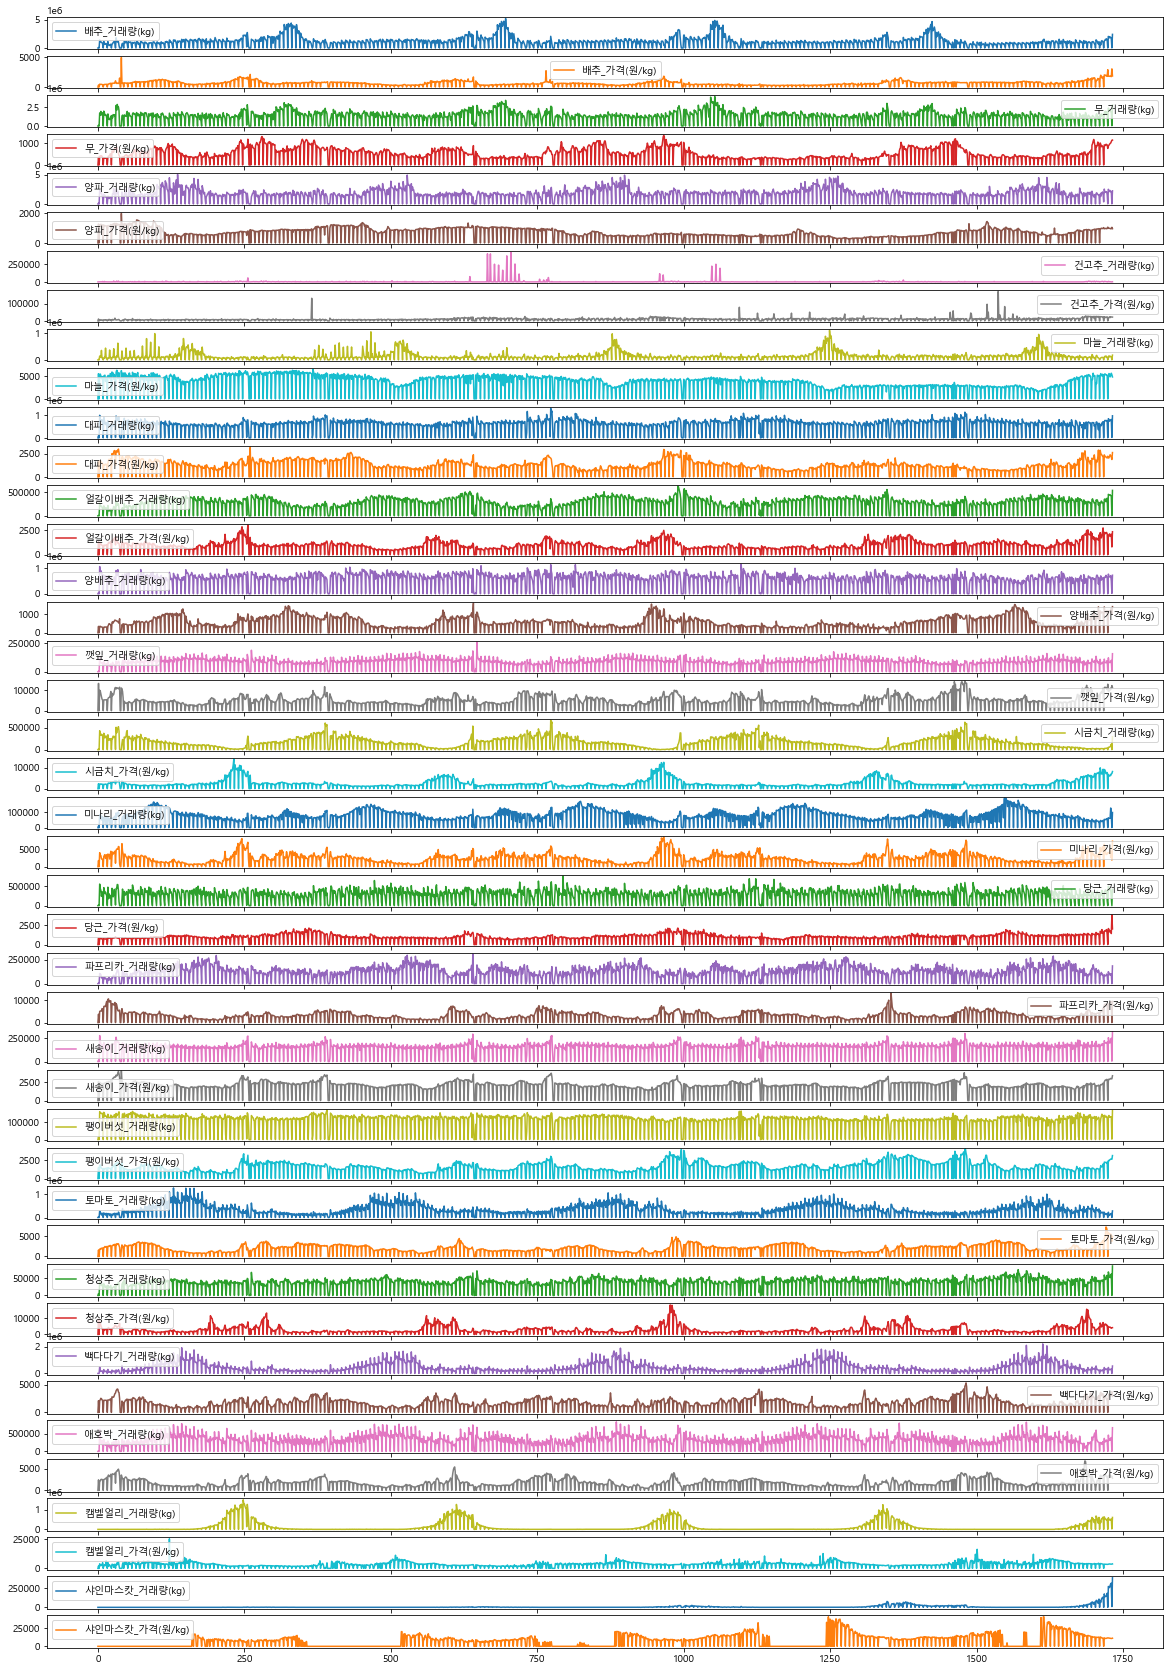

In [81]:
# # 품목별 거래량
df.iloc[:, 2::1].plot(figsize=(20, 30), subplots=True)
plt.show()

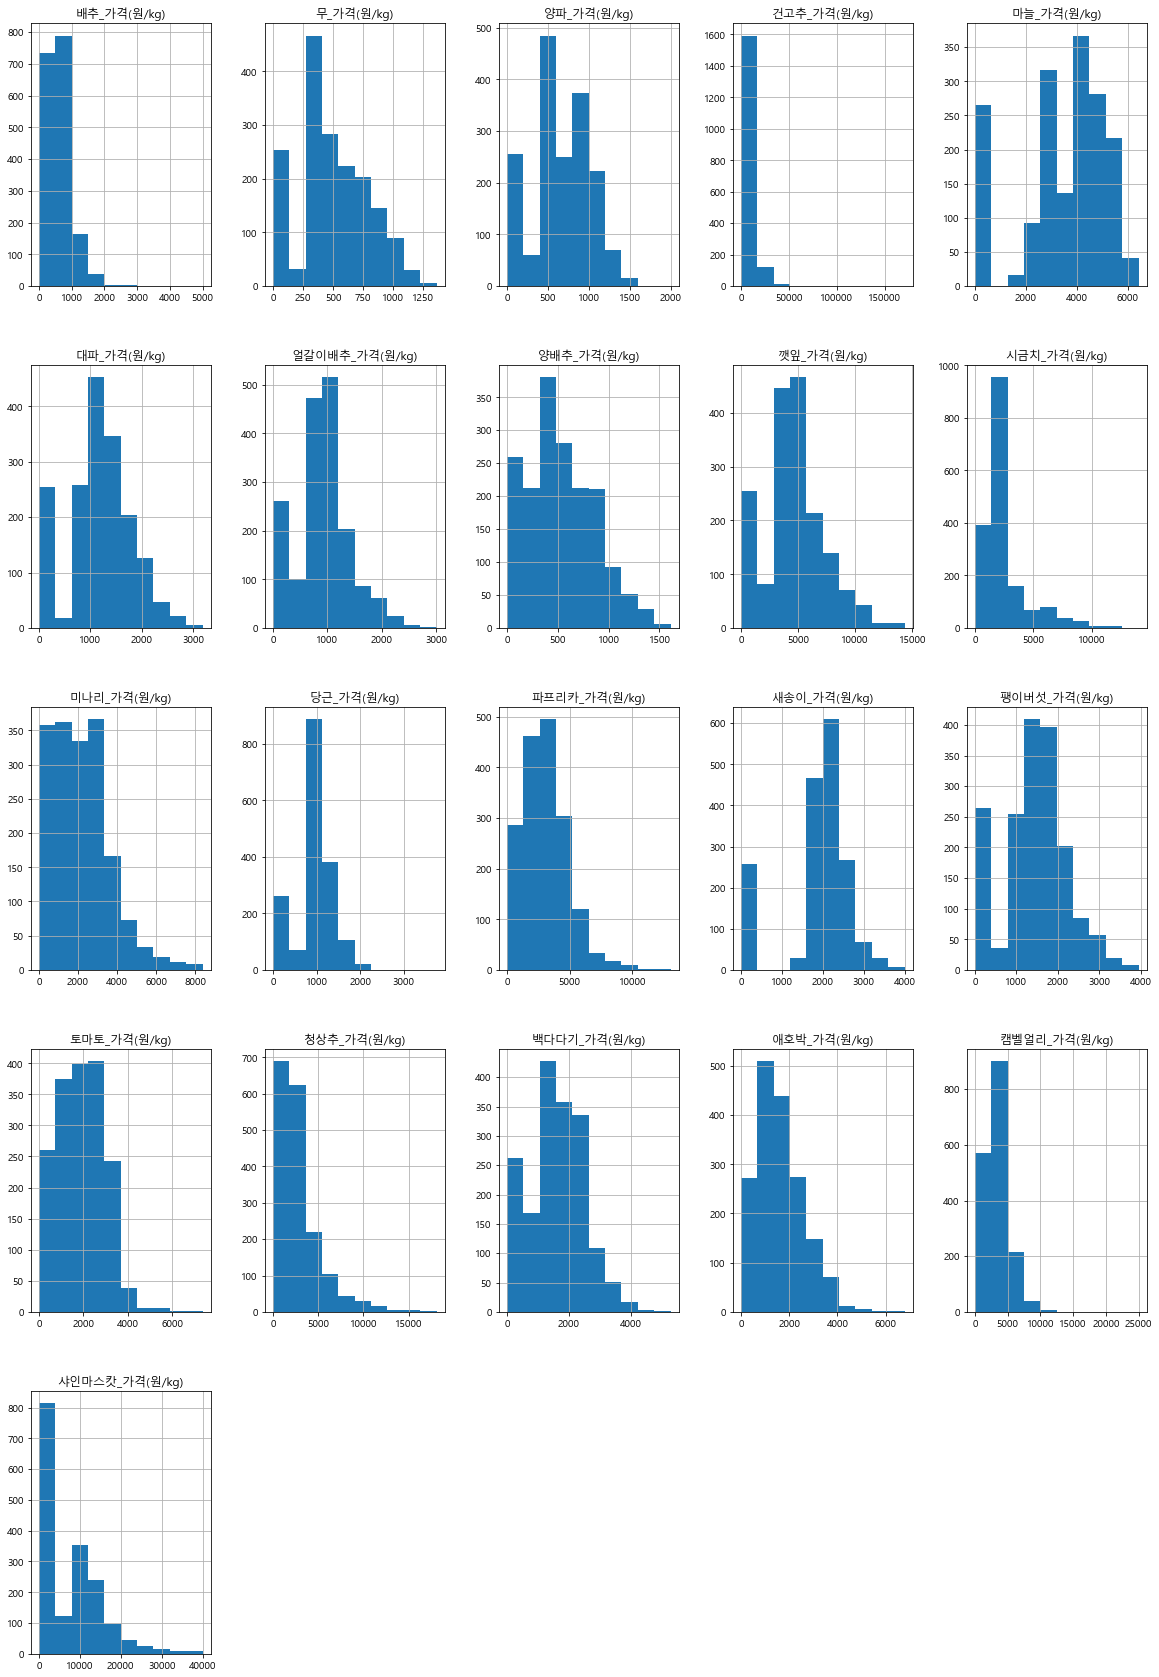

In [82]:
df.iloc[:,3::2].hist(figsize=(20, 30))
plt.show()

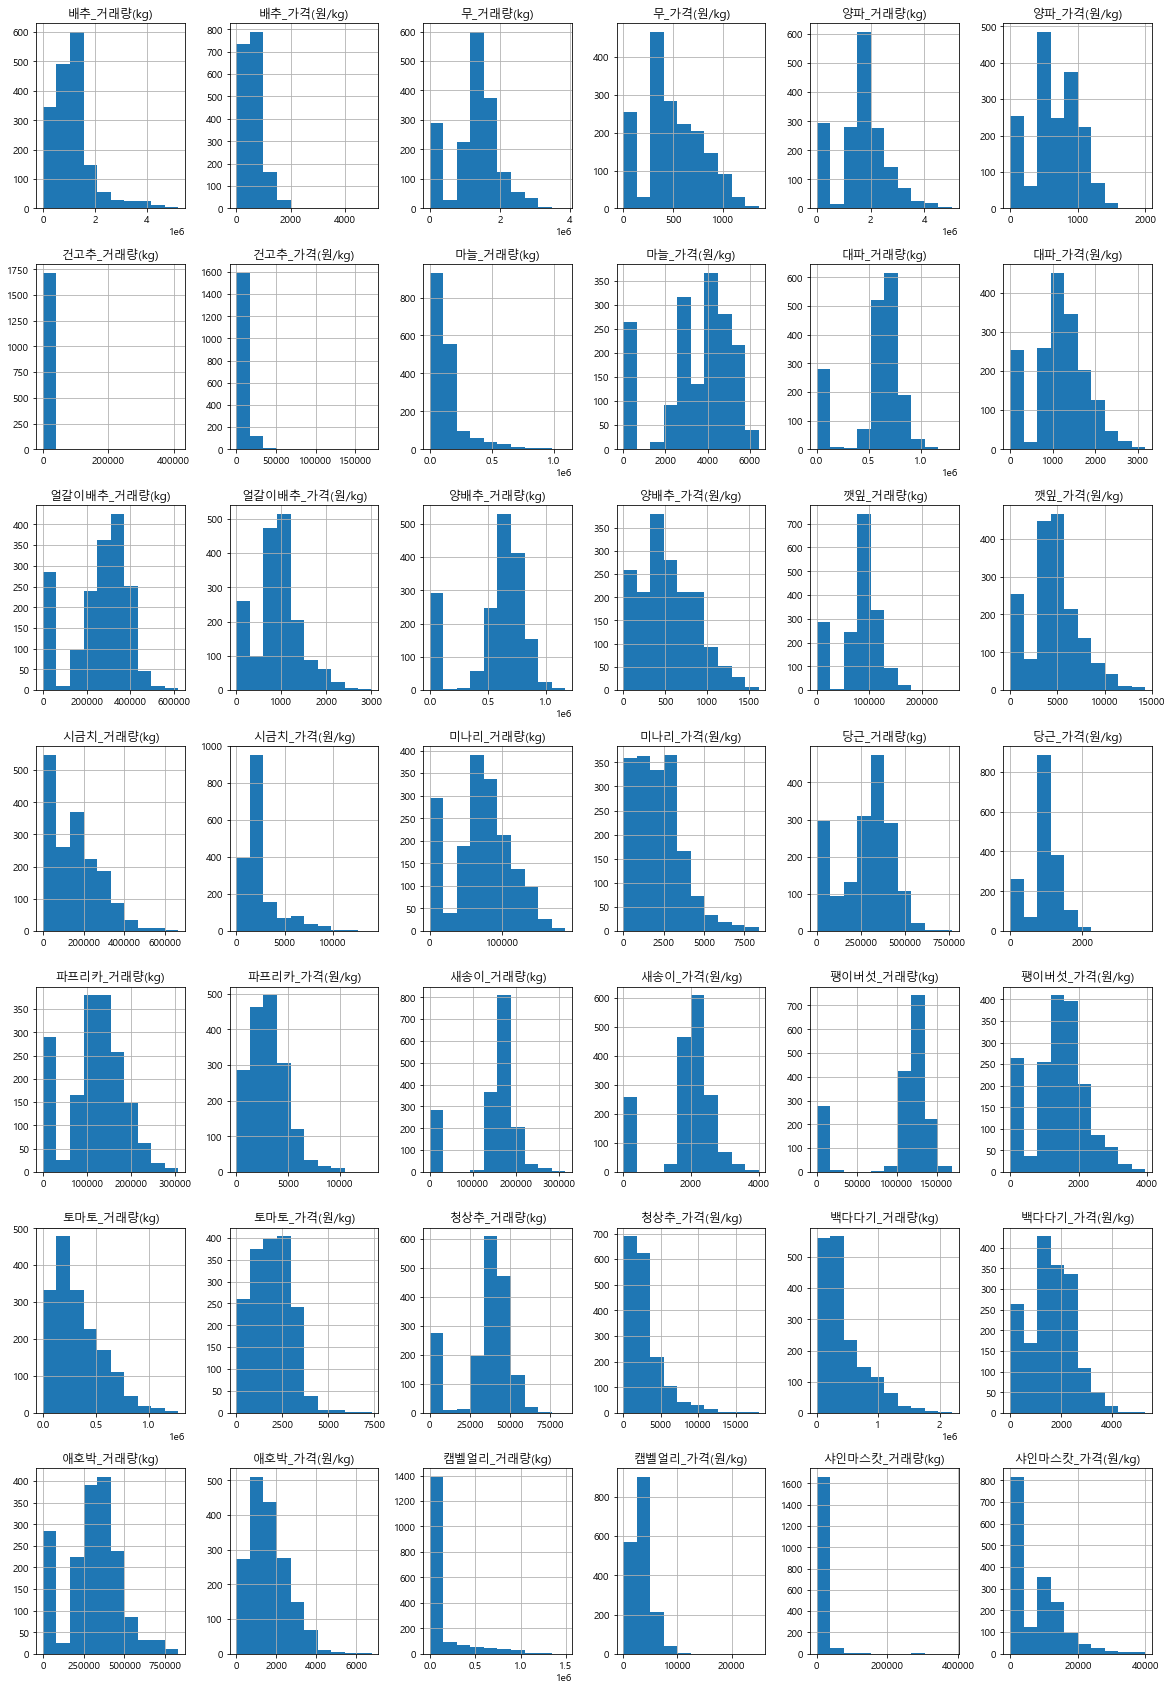

In [83]:
# 거래량
df.iloc[:,2::1].hist(figsize=(20, 30))
plt.show()

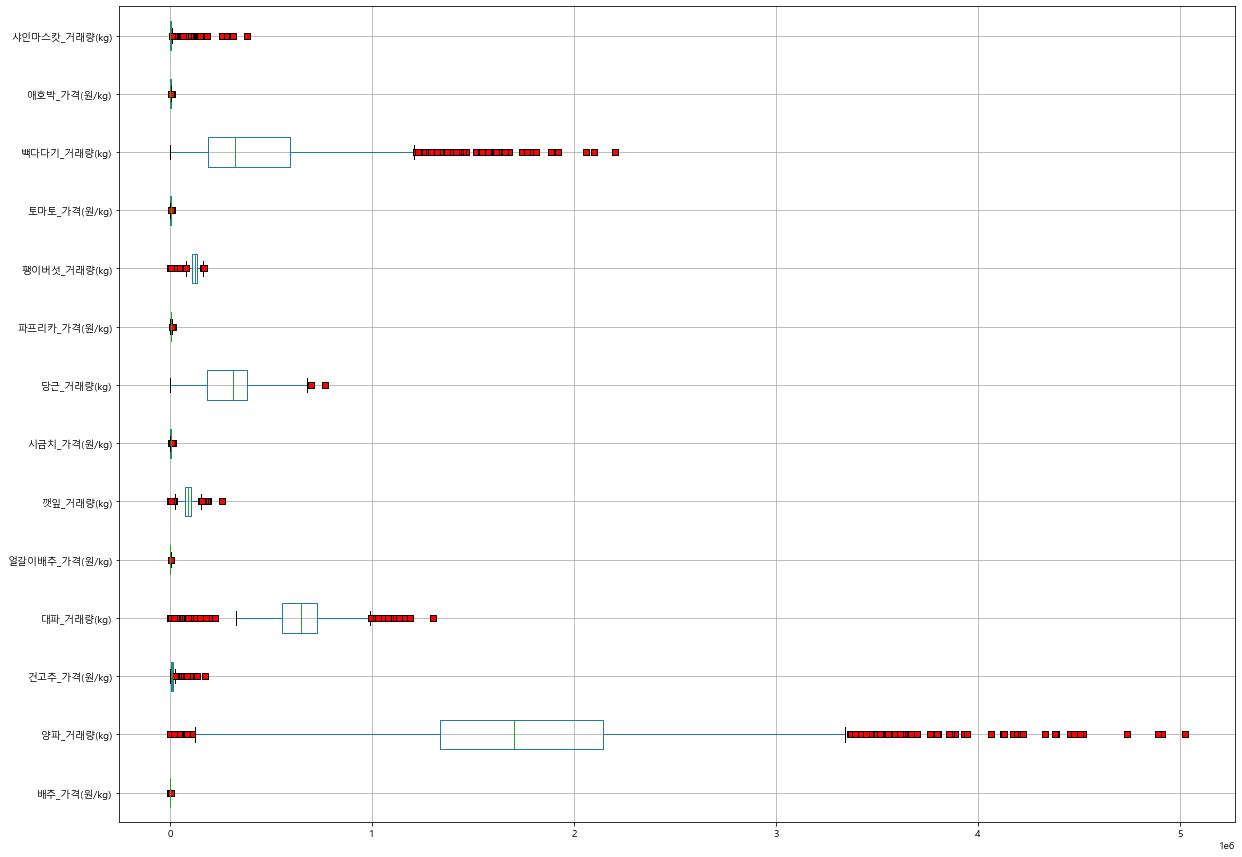

In [84]:
# 이상치 확인
cp_df.iloc[:,3::3].boxplot(figsize=(20, 15)
                                    , vert=False
                                    , flierprops=dict(markerfacecolor='r', marker='s'))
plt.show()

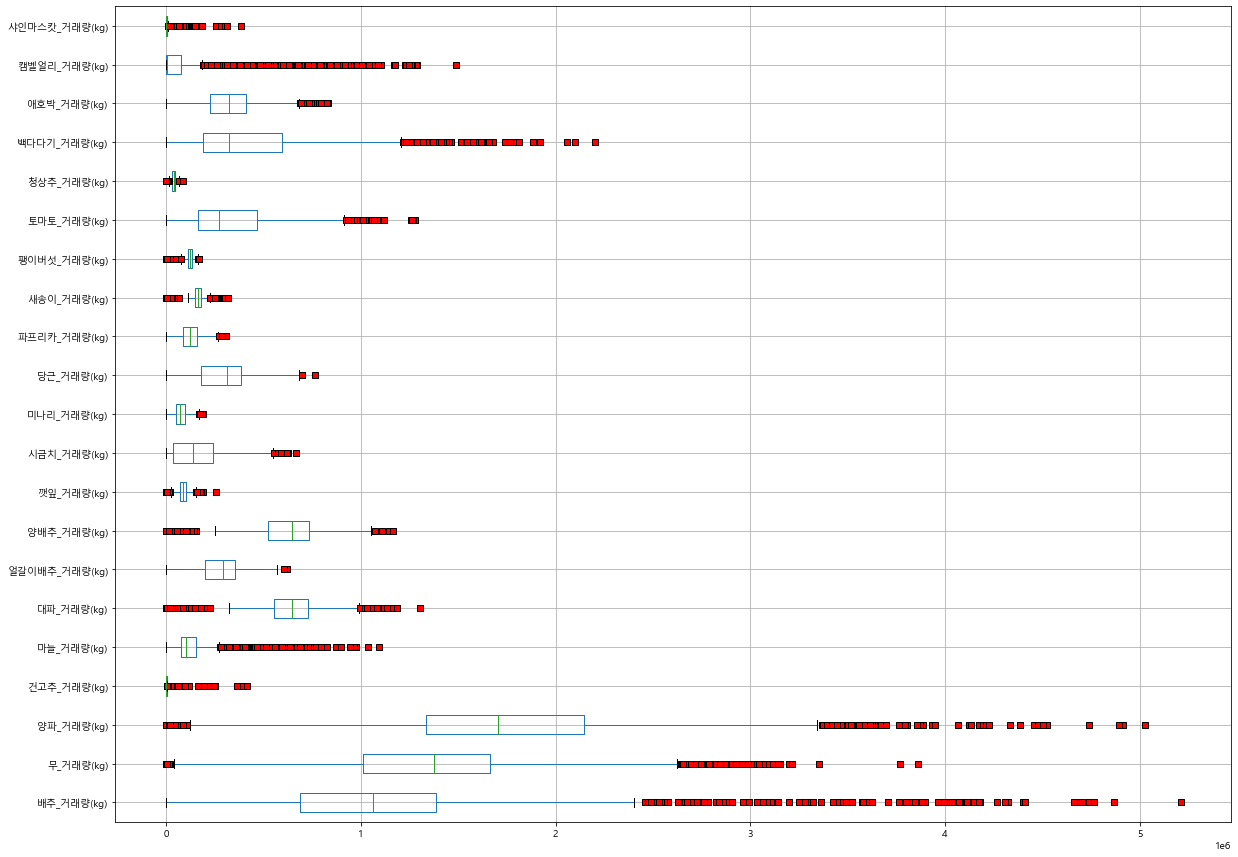

In [85]:
# 이상치 확인
cp_df.iloc[:, ::2].boxplot(figsize=(20, 15)
                                    , vert=False
                                    , flierprops=dict(markerfacecolor='r', marker='s'))
plt.show()

In [86]:
# 이상치에 대한 처리 방안 ? 

# 전처리


In [87]:
# 요일 범주형 > 라벨인코딩 처리
le = LabelEncoder()
le.fit(cp_df.iloc[:, 1])
cp_df['요일']=le.transform(cp_df.iloc[:, 1])

In [88]:
cp_df.head(5)

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,5,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,3,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,6,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [89]:
# MinMaxScaler 정규화 
minmax = MinMaxScaler()
minmax.fit(cp_df.iloc[:, 1:])
cp_df.iloc[:, 1:]=minmax.transform(cp_df.iloc[:, 1:])
# robust = RobustScaler()
# robust.fit(df.iloc[:, 2:])
# df.iloc[:, 2:]=minmax.transform(df.iloc[:, 2:])

In [90]:
# train set => date 를 제외 
input_col_list = cp_df.iloc[:, 1:].columns 
# ytrain set => date 요일 거래량을 제외 하고 가격 컬럼만 추출 
label_col_list = cp_df.iloc[:, 3::2].columns

In [91]:
print(cp_df.shape)
print("label_col_list", len(label_col_list))
print("input_col_list", len(input_col_list))

(1733, 44)
label_col_list 21
input_col_list 43


In [92]:
# baseline 하이퍼파라미터(참고용)
# device = torch.device("cuda:0")         # GPU 사용
# target_n = 21                           # 맞춰야하는 품목/품종의 수
# learning_rate = 5e-4                    # 학습률
# BATCH_SIZE = 128                        # 배치사이즈
# EPOCHS = 50                             # 총 eopochs
# teacher_forcing = False                 # 교사강요 설정
# n_layers = 3                            # rnn레이어 층
# dropout = 0.2                           # 드롭아웃
# window_size = 7                        # 인코더 시퀀스 길이
# future_size = 7                        # 디코더 시퀀스 길이
# hidden_dim = 128                        # rnn 히든차원
# save_path = f'./models/best_model.pt'   # 모델 저장 경로

In [93]:
cp_df.head(5)

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
1,2016-01-02,0.833333,0.015520,0.0658,0.020797,0.264706,0.024437,0.6405,0.000007,0.064389,...,0.060900,0.511068,0.000197,0.398376,0.023032,0.356152,0.000590,0.08056,0.0,0.0
2,2016-01-03,0.666667,0.000000,0.0000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
3,2016-01-04,0.500000,0.273068,0.0956,0.440354,0.280882,0.460735,0.6175,0.001690,0.026130,...,0.457792,0.422302,0.227365,0.386475,0.745976,0.297728,0.001814,0.15540,0.0,0.0
4,2016-01-05,1.000000,0.224029,0.0884,0.368802,0.310294,0.416530,0.6065,0.002690,0.025416,...,0.387559,0.383287,0.067041,0.428410,0.278846,0.321334,0.005911,0.11412,0.0,0.0


In [94]:
# window_size = 14
# future_size = 14

# # 과거 28일의 변화를 보고 미래 28일을 예측
# x_data = []
# y_data = []

# print("전처리 데이터 확인 : cp_df.shape:{0}\twindows_size:{1}\tfuture_size:{2}\ndata.shape[0]-window_size-future_size:{3}".format(cp_df.shape[0], window_size, future_size, cp_df.shape[0]-window_size-future_size))
# for i in range(cp_df.shape[0]-window_size-future_size):
#     x = cp_df.iloc[i:i+window_size, 1:].to_numpy()
#     y = cp_df.iloc[i+window_size:i+window_size+future_size, 3::2].to_numpy()
#     # y_0 = np.zeros([1, y.shape[1]]) # 디코더 첫 입력값 추가
#     x_data.append(x)
#     # y_data.append(np.concatenate([y_0, y], axis=0))
#     y_data.append(y)

In [95]:
# 56 line 제외 
# label size 21 
# input size 43
# shift 28 > 28일 한 묶음 

# LSTM
# 20일치 데이터를 가지고 다음 가격을 예측
def custom_window_dataset(arg_df, arg_shift=20):
    features = arg_df.iloc[:, 1:].copy()
    
    reframe_dt = pd.DataFrame()
    for sft in range(arg_shift, 0, -1):
        shift_dt = features.shift(periods=sft, axis=0)
        shift_dt.reset_index(drop=True, inplace=True)
        reframe_dt.reset_index(drop=True, inplace=True)
        tmp_df = pd.concat([reframe_dt, shift_dt], axis=1)
        reframe_dt = tmp_df.copy()
        
    new_colnm = [col + '_tg' for col in features.iloc[:, 2::2].columns]

    # shift를 한 데이터와 합쳐서 예측값을 생성
    features_df = pd.DataFrame(features.iloc[:, 2::2].values, columns=new_colnm)
    temp_df = pd.concat([reframe_dt, features_df], axis=1)
   
    # NaN 값의 row를 제거
    reframed = temp_df.dropna().copy()
    
    return reframed

In [96]:
# 파라미터 정의
WINDOW_SIZE = 14   # tiemstamp

label_len = len(label_col_list)
features_len = len(input_col_list)

In [97]:
reframed_df = custom_window_dataset(cp_df, WINDOW_SIZE)
print(reframed_df.shape)

(1719, 623)


In [98]:
cp_df.shape, reframed_df.shape

((1733, 44), (1719, 623))

In [99]:
# 데이터 세트 분할 
# 훈련, 검증, 테스트 데이터 세트 (80, 10, 10) 
n = len(reframed_df)
train_df = reframed_df[0:int(n*0.8)]
val_df = reframed_df[int(n*0.8):int(n*0.9)]
test_df = reframed_df[int(n*0.9):]

num_features = reframed_df.shape[1]

In [100]:
# 분할 데이터 확인 
print(train_df.shape, val_df.shape, test_df.shape)
print(num_features)
print("label_col_list", len(label_col_list))
print("input_col_list", len(input_col_list))

(1375, 623) (172, 623) (172, 623)
623
label_col_list 21
input_col_list 43


In [101]:
# x_train / y_train

In [102]:
label_col_list = [col for col in train_df.columns if '_tg' in col]
# label_col_list

In [103]:
# 입력값과 출력값으로 분리
train_X, train_y = train_df.iloc[:, :features_len*WINDOW_SIZE], train_df.loc[:,label_col_list]
val_X, val_y = val_df.iloc[:, :features_len*WINDOW_SIZE], val_df.loc[:,label_col_list]
test_X, test_y = test_df.iloc[:, :features_len*WINDOW_SIZE], test_df.loc[:,label_col_list]

In [104]:
# 범위, 타임스탬프, 컬럼
train_X = train_X.values.reshape((train_X.shape[0], WINDOW_SIZE, features_len))
val_X = val_X.values.reshape((val_X.shape[0], WINDOW_SIZE, features_len))
test_X = test_X.values.reshape((test_X.shape[0], WINDOW_SIZE, features_len))

In [105]:
train_y = train_y.values.reshape((train_y.shape[0], 1, train_y.shape[1]))
val_y = val_y.values.reshape((val_y.shape[0], 1, val_y.shape[1]))
test_y = test_y.values.reshape((test_y.shape[0], 1, test_y.shape[1]))
# print(so_train_X.shape, train_y.shape, test_X.shape, test_y.shape)


In [106]:
print(train_X.shape, len(train_X), train_y.shape)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1375, 14, 43) 1375 (1375, 1, 21)
(1375, 14, 43) (1375, 1, 21) (172, 14, 43) (172, 1, 21)


In [107]:
print(train_X.shape, train_y.shape)
print(val_X.shape, val_y.shape)
print(test_X.shape, test_y.shape)

(1375, 14, 43) (1375, 1, 21)
(172, 14, 43) (172, 1, 21)
(172, 14, 43) (172, 1, 21)


In [108]:
def seed_init(arg_seed: int = 1031):
    keras.backend.clear_session()
    np.random.seed(arg_seed)
    tf.random.set_seed(arg_seed)

In [109]:
seed_init(1031)

In [110]:
def model_perfomance_print(arg_model, arg_model_nm,arg_val_X, arg_val_y, arg_test_X, arg_test_y):
    val_X = arg_val_X
    val_y = arg_val_y 
    
    test_X = arg_test_X
    test_y = arg_test_y       
    
    model = arg_model         # 모델
    model_name = arg_model_nm # 모델 명칭
    
    val_pfmc_dict = {}
    pfmc_dict = {}
    
    #  검증 데이터로 예측모델 평가
    val_evaluate = model.evaluate(val_X, val_y, verbose=2)
    val_pfmc_dict[model_name] = val_evaluate
    #  테스트 데이터로 예측모델 평가
    test_evaluate = model.evaluate(test_X, test_y, verbose=2)
    pfmc_dict[model_name] = test_evaluate
    print("검증 데이터로 예측모델 평가: ", val_evaluate)
    print("테스트 데이터로 예측모델 평가", test_evaluate)

    # r2 score value 
    yhat = model.predict(test_X)
    # yhat.shape
    # yhat = yhat.reshape(yhat.shape[0], 1, yhat.shape[1])
    r2_test_y = test_y.reshape(test_y.shape[0], test_y.shape[2])
    print("r2 score :", r2_score(r2_test_y, yhat))
    
    return val_pfmc_dict, pfmc_dict

In [111]:
def prediction_plot_show(arg_test, arg_pred):    
    test_y_df = pd.DataFrame(arg_test.reshape(arg_test.shape[0]*arg_test.shape[1], arg_test.shape[2]))
    pred_df=pd.DataFrame(arg_pred)
        
    # 예측 데이터 시각화 
    plt.figure(figsize=(20, 10))
    plt.plot(test_y_df.iloc[:, 1], label='actual')
    plt.plot(pred_df.iloc[:, 1], label='prediction')
    plt.legend()
    plt.show()

In [112]:
def perfomance_plot_show(arg_hist):
    hist = arg_hist
    
    # 예측모델 평가 시각화 
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    acc_ax.plot(hist.history['mae'], 'b', label='train mae')
    acc_ax.plot(hist.history['val_mae'], 'g', label='val mae')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('mae')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    pyplot.show()

    plt.subplot(2, 1 , 1)
    # plot history
    pyplot.plot(hist.history['loss'], label='train')
    pyplot.plot(hist.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()

In [113]:
# 하이퍼파라미터 전역변수
# device = torch.device("cuda:0")       # GPU 사용

# 입력/출력 품목/품종의 수
features_n = 43                         # 입력 품목/품종의 수
target_n = 21                           # 맞춰야하는 품목/품종의 수

BATCH_SIZE = 128                        # 배치사이즈
EPOCHS = 100                            # 총 eopochs
dropout = 0.2                           # 드롭아웃
# save_path = f'./best_model.h5'          # 모델 저장 경로
save_path = 'best_model.h5'          # 모델 저장 경로

# Optimizer 함수 최적화 함수 파라미터
# learning_rate
lr_list = [1e-5, 1e-4, 1e-3, 5e-4]            # 0.01 기준으로
lr = lr_list[1]                               # 학습률 0.0005

# Loss(cost) 함수 손실 함수 파라미터
# CNN + RNN 하이퍼 파라미터 
CONV_WIDTH = [3, 5]
filter_size = 32

In [114]:
# 모델 컴파일 및 학습
def model_complie_fit(arg_model, arg_trainx, arg_trainy, arg_valx, arg_valy, arg_patience=10):    
    # init 
    global lr
    global save_path
    global EPOCHS
    global BATCH_SIZE
    patience = arg_patience
    
    train_X = arg_trainx.copy()
    train_y = arg_trainy.copy()
    
    val_X = arg_valx.copy()
    val_y = arg_valy.copy()
    model = arg_model
        
    # 옵티마이저 및 로스 함수 정의 
    optimizer_func = keras.optimizers.Adam(learning_rate=lr)
    # loss_func = keras.losses.MeanAbsoluteError() # MAE 
    loss_func = keras.losses.Huber() # Huber 사용 MAE, MSE 를 합친 outlier 의 영향을 덜 받음  

    # earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
    earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss'
                                                , patience=patience
                                                , mode='min')
    # val_loss 기준 체크포인터 생성합니다.
    checkpoint = keras.callbacks.ModelCheckpoint(save_path, 
                                                save_weights_only=True, 
                                                save_best_only=True, 
                                                monitor='val_loss', 
                                                verbose=1)
    model.compile(loss=loss_func,
                optimizer=optimizer_func,
                metrics=["mae"])

    print("optimizer : Adam \tlearning_rate: ", lr)
    print("obtimizer_function: [{0}]".format(optimizer_func))
    print("loss_function: [{0}]".format(loss_func.fn))
    print("metrics: mae")
    print("="*100)
    print("epochs: {0} \t배치 사이즈 : {1}".format(EPOCHS, BATCH_SIZE))
    print("callbacks early_stopping: [{0}] \tpatience: [{1}]".format(earlystopping.monitor, patience))
    print("="*100)
    
    history=model.fit(train_X, train_y, epochs=EPOCHS, batch_size=BATCH_SIZE
                            , validation_data=(val_X, val_y), callbacks=[checkpoint, earlystopping]
                            , verbose=2, shuffle=False)
    return history

In [115]:
# 모델 구성 CNN + LSTM
conv_lstm_model = keras.Sequential([
    keras.layers.Conv1D(filters=filter_size, kernel_size=(CONV_WIDTH[1], ),
                           strides=1, padding="causal", 
                           activation="relu", 
                           input_shape=[WINDOW_SIZE, features_n]), 
    # keras.layers.LSTM(32, activation="relu", return_sequences=True),
    keras.layers.LSTM(32, activation="relu", return_sequences=False),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(target_n),
    # keras.layers.Lambda(lambda x: x * 200)
])
conv_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 14, 32)            6912      
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dense_1 (Dense)              (None, 21)                357       
Total params: 16,117
Trainable params: 16,117
Non-trainable params: 0
_________________________________________________________________


In [116]:
hist = model_complie_fit(conv_lstm_model, train_X, train_y, val_X, val_y)

optimizer : Adam 	learning_rate:  0.0001
obtimizer_function: [<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000020BF1F3C310>]
loss_function: [<function huber at 0x0000020BDF6240D0>]
metrics: mae
epochs: 100 	배치 사이즈 : 128
callbacks early_stopping: [val_loss] 	patience: [10]
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.05742, saving model to best_model.h5
11/11 - 0s - loss: 0.0550 - mae: 0.2675 - val_loss: 0.0574 - val_mae: 0.2837
Epoch 2/100

Epoch 00002: val_loss improved from 0.05742 to 0.05180, saving model to best_model.h5
11/11 - 0s - loss: 0.0491 - mae: 0.2497 - val_loss: 0.0518 - val_mae: 0.2652
Epoch 3/100

Epoch 00003: val_loss improved from 0.05180 to 0.04777, saving model to best_model.h5
11/11 - 0s - loss: 0.0448 - mae: 0.2362 - val_loss: 0.0478 - val_mae: 0.2510
Epoch 4/100

Epoch 00004: val_loss improved from 0.04777 to 0.04483, saving model to best_model.h5
11/11 - 0s - loss: 0.0419 - mae: 0.2273 - val_loss: 0.0448 - val_mae: 0.2414
Epoch 5/100

In [117]:
# 저장한 데이터를 로드
conv_lstm_model.load_weights("best_model.h5")
# conv_lstm_model = keras.models.load_weights("best_model.h5")
pred = conv_lstm_model.predict(test_X)

In [118]:
# pred.shape, test_y.shape

In [119]:
val_performance_dict = {}
performance_dict = {}

In [120]:
val_performance_dict, performance_dict = model_perfomance_print(conv_lstm_model, "CNN_LSTM", val_X, val_y, test_X, test_y)

6/6 - 0s - loss: 0.0176 - mae: 0.1427
6/6 - 0s - loss: 0.0169 - mae: 0.1302
검증 데이터로 예측모델 평가:  [0.017557967454195023, 0.14270438253879547]
테스트 데이터로 예측모델 평가 [0.016855834051966667, 0.13024726510047913]
r2 score : -0.06326254574069234


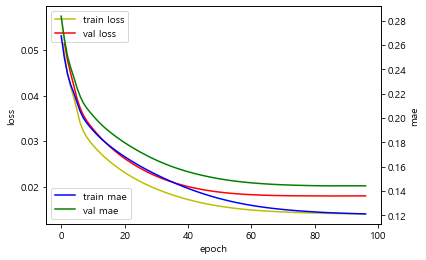

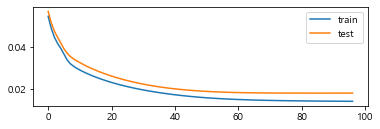

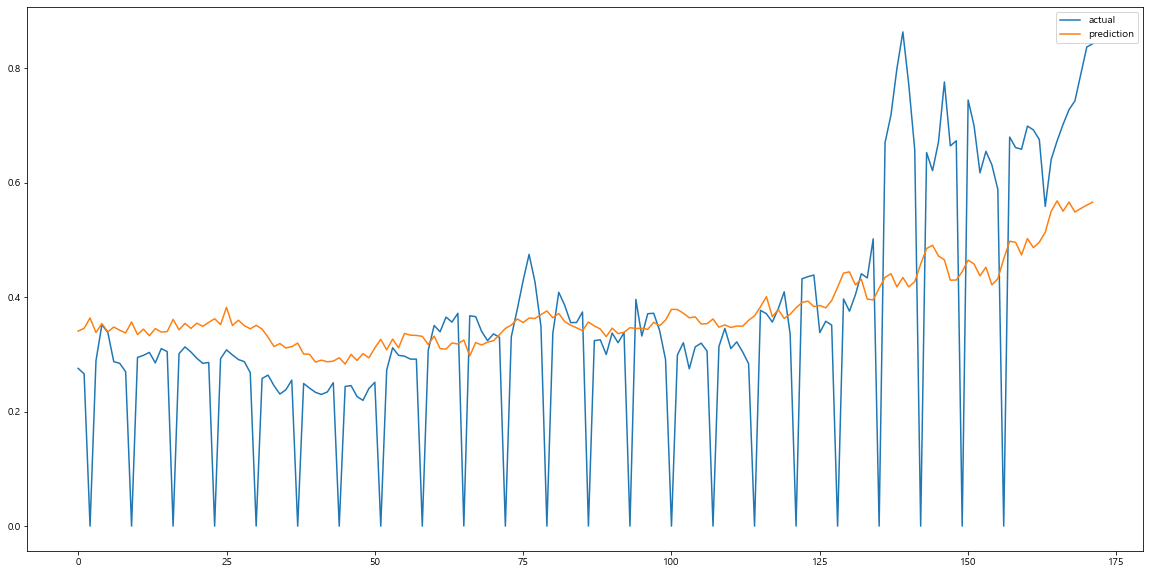

In [121]:
perfomance_plot_show(hist)
prediction_plot_show(test_y, pred)

In [122]:
# val_performance = {}
# performance = {}
# val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
# performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

NameError: name 'baseline' is not defined

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs) mean_absolute_error')
_ = plt.legend()

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')